In [25]:
import numpy as np
import pandas as pd

In [27]:
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('ml-100k/u.user', sep='|', names=u_cols, encoding='latin-1', parse_dates=True)

r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('ml-100k/u.data', sep='\t', names=r_cols, encoding='latin-1')

m_cols = ['movie_id', 'movie_title', 'release_date', 'video_release_date','imdb_url', 'unknown', 'Action' , 'Adventure' , 'Animation', "Children's" , 'Comedy' , 'Crime' , 'Documentary' , 'Drama' , 'Fantasy', "Film-Noir" , "Horror" , "Musical" , "Mystery" , "Romance" , "Sci-Fi" ,"Thriller" , "War" , "Western" ]
movies = pd.read_csv('ml-100k/u.item', sep='|', names=m_cols, usecols=range(24), encoding='latin-1')

movie_ratings = pd.merge(movies, ratings)
df = pd.merge(movie_ratings, users)

print(df.shape)
print(df.columns)

(100000, 31)
Index(['movie_id', 'movie_title', 'release_date', 'video_release_date',
       'imdb_url', 'unknown', 'Action', 'Adventure', 'Animation', 'Children's',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western', 'user_id', 'rating', 'unix_timestamp', 'age', 'sex',
       'occupation', 'zip_code'],
      dtype='object')


In [28]:
# drop columns video_release_date, imdb_url
df.drop("video_release_date", axis = 1, inplace = True)
df.drop("imdb_url", axis = 1, inplace = True)
df.drop('movie_title', axis = 1, inplace = True)

In [29]:
# drop rows where release_date is NaN
df.drop(index = df[df['release_date'].isnull()].index, inplace = True)

In [30]:
# bin age
df['age'] = pd.cut(df['age'], np.arange(0,90,10))

In [31]:
# format zip_code
df['zip_code'] = df['zip_code'].str[0]

In [32]:
# format release_date
import calendar
import datetime

def date_to_unix(data):
    arr = list()
    for i,l in enumerate(data):
        if ord(l) == 45:
            arr.append(i)
    date = int(data[0:arr[0]])
    month_name = data[arr[0]+1:arr[1]]
    datetime_object = datetime.datetime.strptime(month_name, "%b")
    month = datetime_object.month
    year = int(data[arr[1]+1:arr[1]+5])
    date = datetime.datetime(year, month, date, 0, 0)
    utc_time = calendar.timegm(date.utctimetuple())
    return(utc_time)

df['release_date'] = df['release_date'].apply(date_to_unix)

In [8]:
# get mean_rating

In [33]:
## Start to set up df_training and df_testing

df_testing = df[['rating']]
df_training = pd.DataFrame()
group_shapes = []

In [34]:
# First, ohe movie_id, user_id, sex, age, occupation
ohe_columns = ['user_id', 'movie_id', 'sex', 'age', 'occupation', 'zip_code']
for column in ohe_columns:
    df_ohe = pd.get_dummies(df[column], prefix=column)
    df_training = pd.concat([df_training, df_ohe], axis=1, ignore_index=True)
    group_shapes.append(len(df_ohe.columns))


In [35]:
# Handle the genre field, which is already ohe
genre_columns = ['unknown', 'Action' , 'Adventure' , 'Animation', "Children's" , 'Comedy' , 'Crime' , 'Documentary' , 'Drama' , 'Fantasy', "Film-Noir" , "Horror" , "Musical" , "Mystery" , "Romance" , "Sci-Fi" ,"Thriller" , "War" , "Western"]
df_training = pd.concat([df_training, df[genre_columns]], axis=1, ignore_index=True)
group_shapes.append(len(genre_columns))


In [12]:
# Then append the non-ohe columns
# Wait. For some reason, the algorithm performs really badly when these columns are included. Exclude them for now.
# non_ohe_columns = df.loc[:, ~df.columns.isin(ohe_columns + genre_columns + ['rating'])].columns.tolist()
# df_training = pd.concat([df_training, df[non_ohe_columns]], axis=1, ignore_index=True)
# group_shapes.extend([1 for column in non_ohe_columns])


In [36]:
print(df_training.shape)
print(df_testing.shape)
print(group_shapes)

(99991, 2693)
(99991, 1)
[943, 1681, 2, 8, 21, 19, 19]


In [37]:
# Save group_shapes to file
np.savetxt("group_shapes", 
           group_shapes,
           delimiter =", ", 
           fmt ='% s')

In [38]:
# Save df_training and df_testing to file
df_training.to_csv('x_data', header=False, index=False)
df_testing.to_csv('y_data', header=False, index=False)

In [39]:
df_training

,0,1,2,3,4,5,6,7,8,9,...,2683,2684,2685,2686,2687,2688,2689,2690,2691,2692
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
99996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
99997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
99998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
df_testing

,rating
0,4
1,5
2,4
3,4
4,5
...,...
99995,4
99996,3
99997,3
99998,1


In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

# visualisations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("whitegrid")
sns.set(rc = {'figure.figsize':(15, 10)})

In [42]:
big_df = df_training.join(df_testing)
big_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2684,2685,2686,2687,2688,2689,2690,2691,2692,rating
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,4
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


In [43]:
big_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99991 entries, 0 to 99999
Columns: 2694 entries, 0 to rating
dtypes: int64(20), uint8(2674)
memory usage: 273.0 MB


In [44]:
df_train, df_test = train_test_split(big_df, test_size=0.2)

X_train, y_train = df_train.drop('rating',axis=1), df_train['rating']
X_test, y_test = df_test.drop('rating',axis=1), df_test['rating']

In [45]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,2683,2684,2685,2686,2687,2688,2689,2690,2691,2692
92885,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
23725,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
57467,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2062,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
25414,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
y_train.head()

92885    4
23725    4
57467    5
2062     2
25414    2
Name: rating, dtype: int64

In [47]:
# create the classifier
classifier = RandomForestClassifier(n_estimators=100)

# Train the model using the training sets
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [48]:
import time
import numpy as np

start_time = time.time()
importances = classifier.feature_importances_
std = np.std([tree.feature_importances_ for tree in classifier.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.188 seconds


In [49]:
# predicting on the test set
y_pred = classifier.predict(X_test)

In [50]:
from sklearn.metrics import accuracy_score
# Calculate Model Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.4104205210260513


In [51]:
feature_names = [f"feature {i}" for i in range(big_df.shape[1])]
len(feature_names)

2694

In [52]:
# check Important features
feature_importances_df = pd.DataFrame(
    {"feature": list(df_training.columns), "importance": classifier.feature_importances_}
).sort_values("importance", ascending=False)

# Display
feature_importances_df

,feature,importance
2688,2688,0.013355
2690,2690,0.011458
2664,2664,0.010400
2689,2689,0.010091
2628,2628,0.008971
...,...,...
2467,2467,0.000000
2448,2448,0.000000
1755,1755,0.000000
1798,1798,0.000000


In [53]:
feature_importances_df = feature_importances_df.sort_values('importance', axis=0, ascending=False)
feature_importances_df

,feature,importance
2688,2688,0.013355
2690,2690,0.011458
2664,2664,0.010400
2689,2689,0.010091
2628,2628,0.008971
...,...,...
2284,2284,0.000000
2581,2581,0.000000
2307,2307,0.000000
2599,2599,0.000000


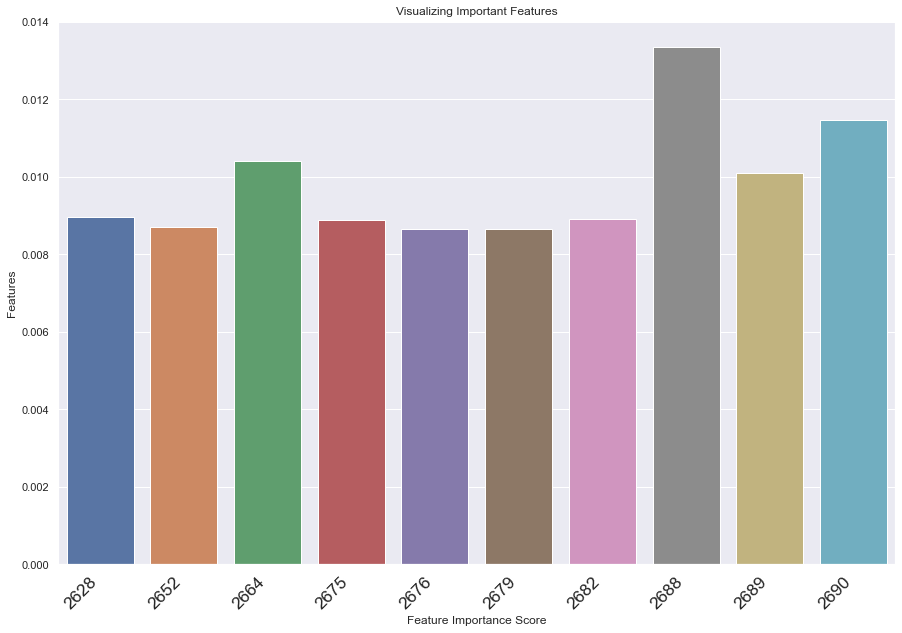

In [54]:
# visualize important featuers

# Creating a bar plot
sns.barplot(x=feature_importances_df[:10].feature, y=feature_importances_df.importance)
# Add labels to your

plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important Features")
plt.xticks(
    rotation=45, horizontalalignment="right", fontweight="light", fontsize="x-large"
)
plt.show()